Odev cozumu

In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
#import dataframe
food_consumption = pd.read_csv("C:/Users/Abdulrhman Al-Tabali/Desktop/statistics/assignment/food_consumption.csv",index_col=0)
food_consumption.head()

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96


In [15]:
#filter for Germany or USA
belg_food_consumption = food_consumption[(food_consumption["country"] == "Germany") | (food_consumption["country"] == "USA")]
belg_food_consumption

,country,food_category,consumption,co2_emission
56,USA,pork,27.64,97.83
57,USA,poultry,50.01,53.72
58,USA,beef,36.24,1118.29
59,USA,lamb_goat,0.43,15.06
60,USA,fish,12.35,19.72
61,USA,eggs,14.58,13.39
62,USA,dairy,254.69,362.78
63,USA,wheat,80.43,15.34
64,USA,rice,6.88,8.80
65,USA,soybeans,0.04,0.02


In [27]:
#find the mean and median for Belguim
df_belgium = food_consumption[food_consumption['country']== "Belgium"]
print(df_belgium)


mean_consumption = df_belgium['consumption'].mean()
median_consumption = df_belgium['consumption'].median()
#or
# mean_consumption = np.mean(df_belgium['consumption'])
# median_consumption = np.median(df_belgium['consumption'])


print(f'the mean of the consumption in Belgium is {mean_consumption} and the median of the consumption in Belgium is {median_consumption}')

     country food_category  consumption  co2_emission
397  Belgium          pork        38.65        136.80
398  Belgium       poultry        12.20         13.11
399  Belgium          beef        15.63        482.31
400  Belgium     lamb_goat         1.32         46.23
401  Belgium          fish        18.97         30.29
402  Belgium          eggs        12.59         11.57
403  Belgium         dairy       236.19        336.43
404  Belgium         wheat       111.91         21.34
405  Belgium          rice         8.61         11.02
406  Belgium      soybeans         0.07          0.03
407  Belgium          nuts         7.32         12.96
the mean of the consumption in Belgium is 42.13272727272727 and the median of the consumption in Belgium is 12.59


In [30]:
#calculate the mean and median values for USA

df_USA = food_consumption[food_consumption['country']=='USA']
print(df_USA)
mean_cons_USA = df_USA['consumption'].mean()
median_cons_USA = df_USA['consumption'].median()
print(
    f'the mean of the consumption in Belgium is {mean_cons_USA} and the median of the consumption in Belgium is {median_cons_USA}')


   country food_category  consumption  co2_emission
56     USA          pork        27.64         97.83
57     USA       poultry        50.01         53.72
58     USA          beef        36.24       1118.29
59     USA     lamb_goat         0.43         15.06
60     USA          fish        12.35         19.72
61     USA          eggs        14.58         13.39
62     USA         dairy       254.69        362.78
63     USA         wheat        80.43         15.34
64     USA          rice         6.88          8.80
65     USA      soybeans         0.04          0.02
66     USA          nuts         7.86         13.91
the mean of the consumption in Belgium is 44.650000000000006 and the median of the consumption in Belgium is 14.58


In [ ]:
# Work with both countries together
# group by and aggregation
be_and_usa = food_consumption[(food_consumption['country'] == 'Belgium') |
                              (food_consumption['country'] == 'USA')]

# Q-3) Group by country, select consumption column, and compute mean and median
# df.groupby(['group_col'])['value_col'].mean()

mean = be_and_usa.groupby(['country'])['consumption'].mean()
median = be_and_usa.groupby(['country'])['consumption'].median()
print(f'the mean is \n {mean}')
print()
print(f' the median is \n {median}')

####################################


In [ ]:
# another wat of aggregation
be_and_usa_group = be_and_usa.groupby(["country"])
be_and_usa_group['consumption'].aggregate(["mean", "median"])


In [ ]:
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']
rice_consumption

# Q-4)Plot the histogram of co2_emission for rice

fig = plt.figure(figsize=(8, 8))
plt.hist(rice_consumption['co2_emission'],
         bins=20, color='blue', edgecolor="k")
plt.xlabel('CO2 emission for rice')
plt.ylabel('frequency')
plt.title("histogram for rice CO2 emission")


In [56]:
# Q-6) Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 6)))


    


[   0.       3.54    11.026   25.59    99.978 1712.   ]


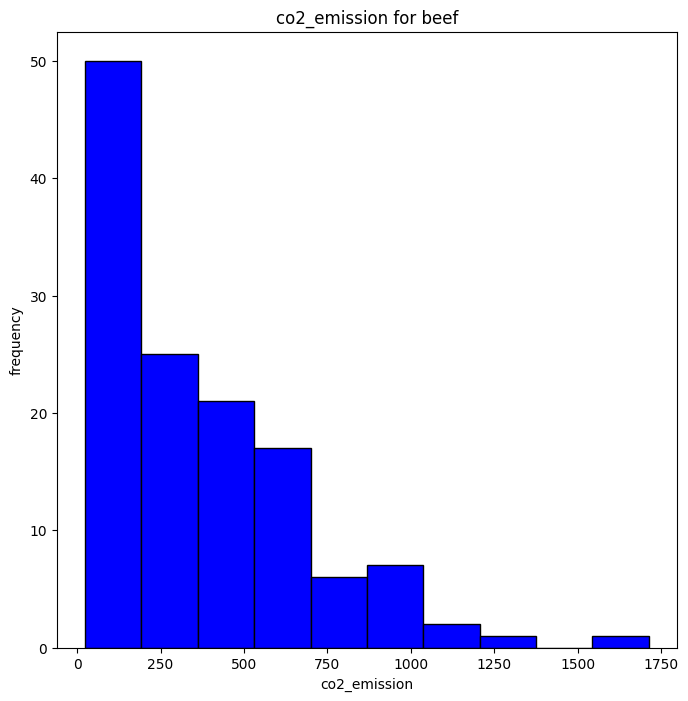

In [66]:
# Q-7) Calculate the variance and standard deviation of co2_emission
#     for food_categories

grouped = food_consumption.groupby(["food_category"])
grouped["co2_emission"].aggregate(["var", "std"])


#  Q-8) Create histogram of co2_emission for food_category 'beef'
filter = food_consumption[food_consumption["food_category"]=="beef"]
plt.figure(figsize=(8,8))
plt.hist (filter['co2_emission'],bins=10,color="blue",edgecolor="k")
plt.xlabel("co2_emission")
plt.ylabel("frequency")
plt.title("co2_emission for beef")
plt.show()


country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


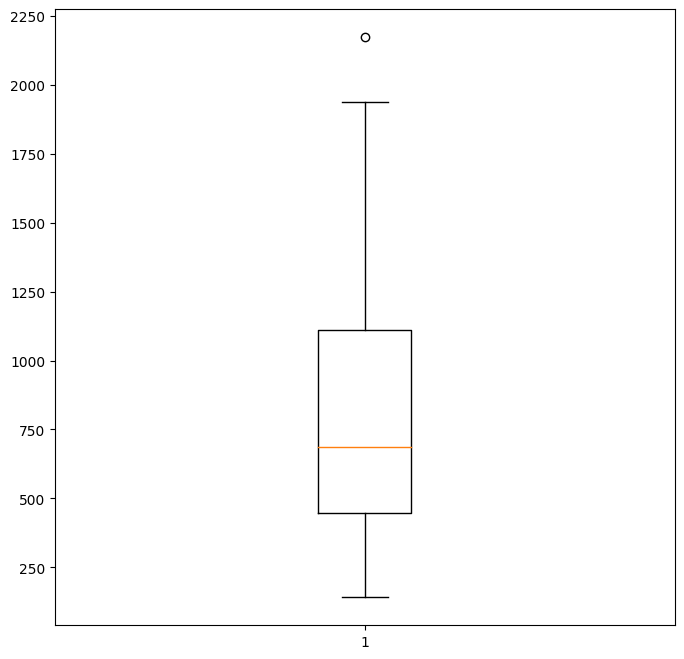

In [79]:
#finding outliers using interquartile range IQR 

emissions_by_country = food_consumption.groupby("country")[
    "co2_emission"].sum()

print(emissions_by_country)
plt.figure(figsize=(8,8))
plt.boxplot(emissions_by_country)
plt.show()


In [80]:
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country > upper) | (
    emissions_by_country < lower)]
print(outliers)
# ABaa

country
Argentina    2172.4
Name: co2_emission, dtype: float64
